<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/Final_Project_505_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

Import Necessary Libraries

In [ ]:
import os #paths to file
import numpy as np
import pandas as pd # data processing
import warnings# warning filter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Modeling
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

In [ ]:
#Load data
df_train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
print(f"training set (row, col): {df_train.shape} \ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 13) 
testing set (row, col): (367, 12)


In [ ]:
#handle nulls
df_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Drop ID column
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)

#checking the new shapes
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


Handle Missing Values

In [ ]:
# Show sum of missing values per column
print("With Null Values\n\n","#"*50,"\n")
print(df_train.isnull().sum().sort_values(ascending=False))

# Handling missing values
# Fill numeric features with mean, categorical features with mode
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_test[col] = df_test[col].fillna(df_test[col].mean())

for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(df_train[col].mode()[0])
# Show updated missing values
print("\nWithout Null Values\n\n","#"*50,"\n")
print(df_train.isnull().sum().sort_values(ascending=False))


With Null Values

 ################################################## 

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Without Null Values

 ################################################## 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
for col in null_cols:
    print(f"\n{col}:\n{df_train[col].value_counts()}\n","-"*100)

EDA

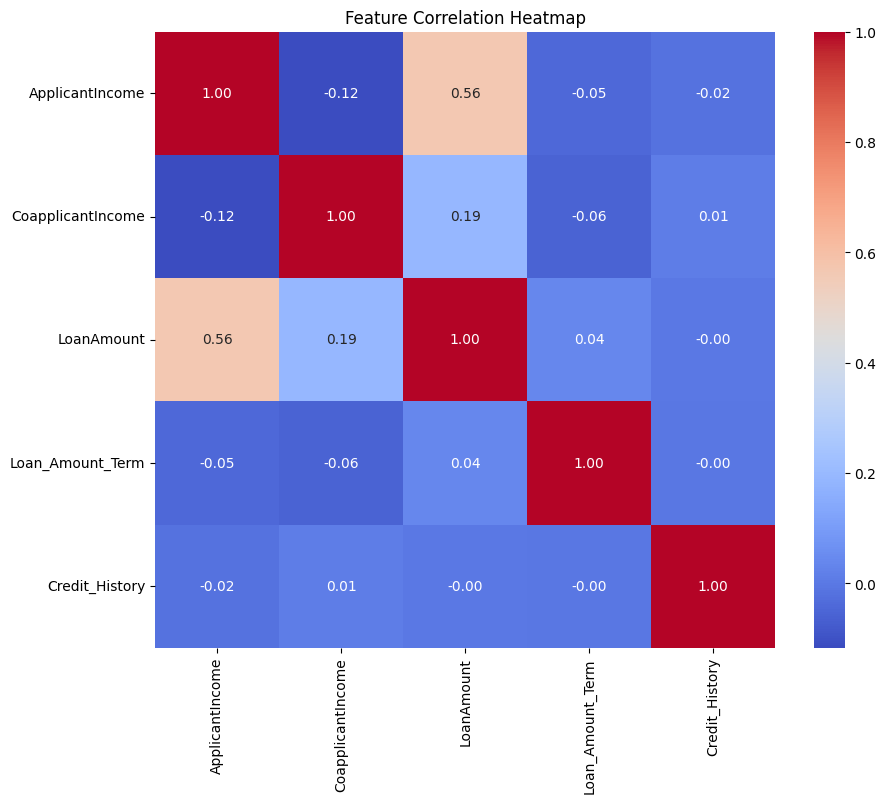

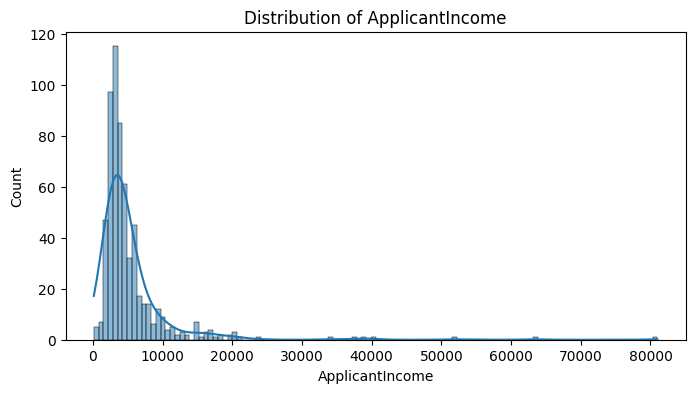

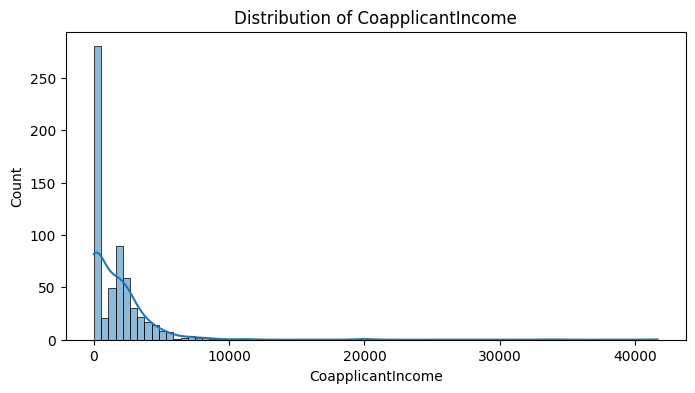

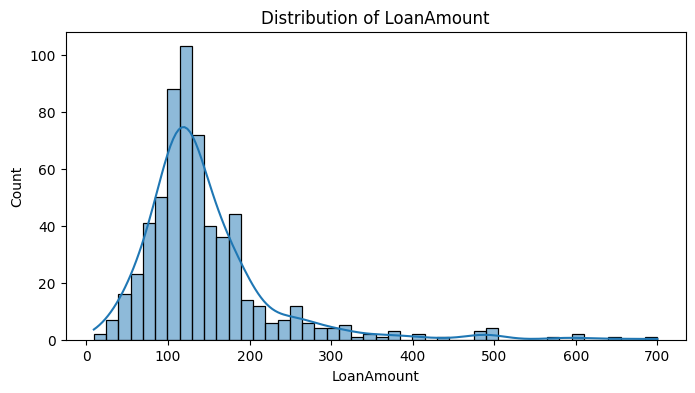

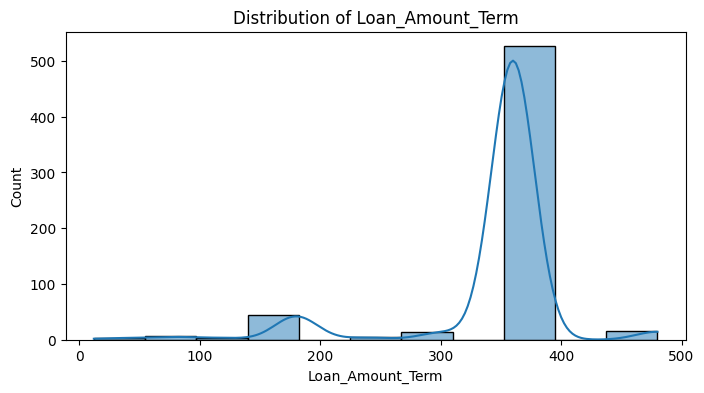

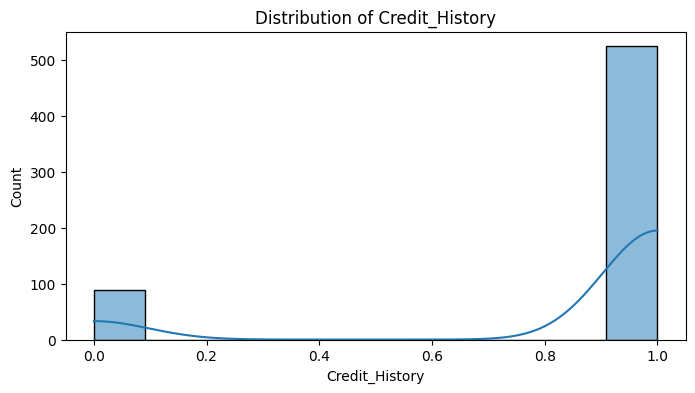

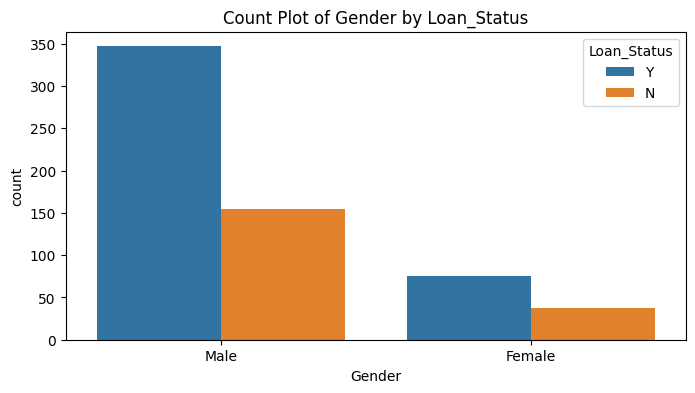

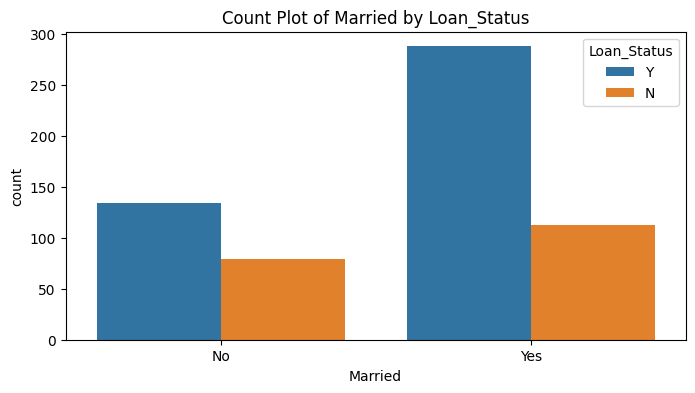

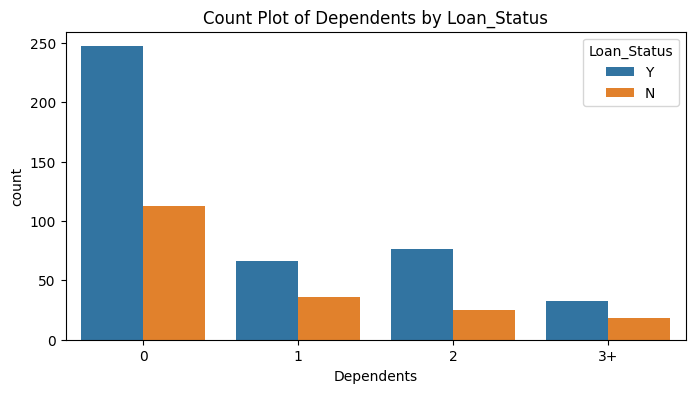

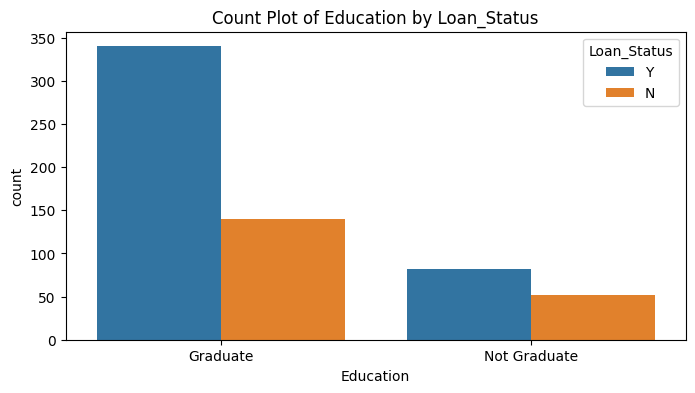

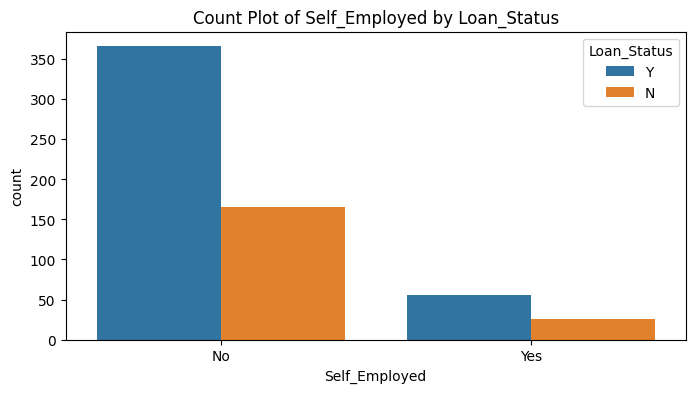

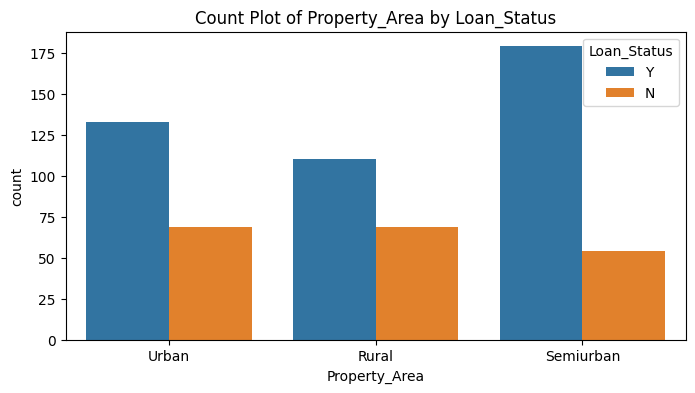

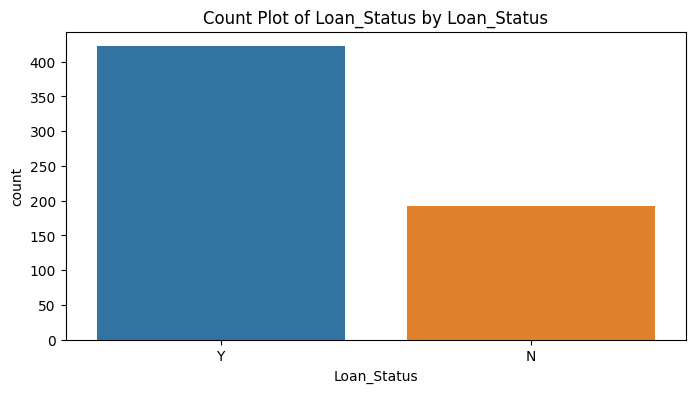

In [ ]:
import seaborn as sns
# Select only numeric columns for correlation
numeric_df_train = df_train.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution plots for numerical columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
categorical_columns = df_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_train, x=col, hue='Loan_Status')
    plt.title(f'Count Plot of {col} by Loan_Status')
    plt.show()

In [ ]:
# Example: Creating a feature that captures the income to loan ratio
df_train['Income_Loan_Ratio'] = (df_train['ApplicantIncome'] + df_train['CoapplicantIncome']) / df_train['LoanAmount']
df_test['Income_Loan_Ratio'] = (df_test['ApplicantIncome'] + df_test['CoapplicantIncome']) / df_test['LoanAmount']

# Creating a binary feature to indicate if a co-applicant is present
df_train['Has_Coapplicant'] = df_train['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)
df_test['Has_Coapplicant'] = df_test['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

###Data Visualization

In [ ]:
#list of all the columns
Cols = df_train.columns.tolist()
#list of all the numeric columns
number = df_train.select_dtypes('number').columns.to_list()
#list of all the categorical columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
loan_number =  df_train[number]
#categoric df
loan_cat = df_train[cat]

Loan_Status
Y    422
N    192
Name: count, dtype: int64


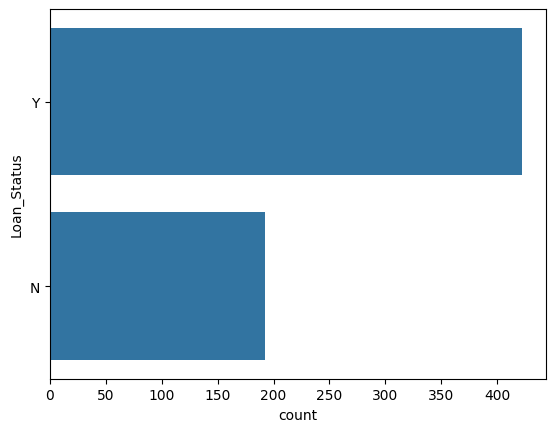

In [ ]:
print(df_train[cat[-1]].value_counts())
#tr_df[cat[-1]].hist(grid = False)


total = float(len(df_train[cat[-1]]))
ax = sns.countplot(df_train[cat[-1]])
plt.show()

Numerical Columns

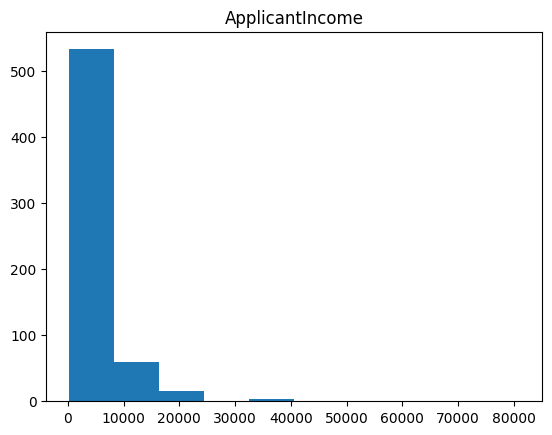

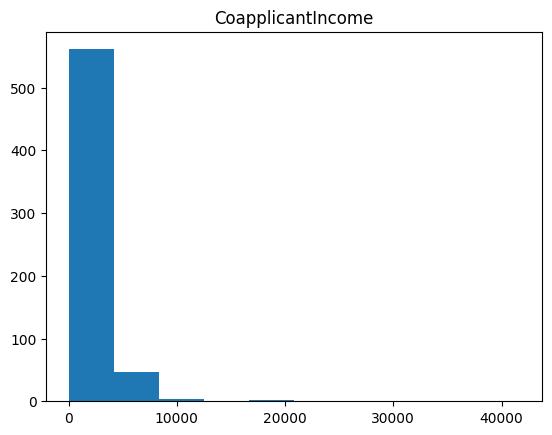

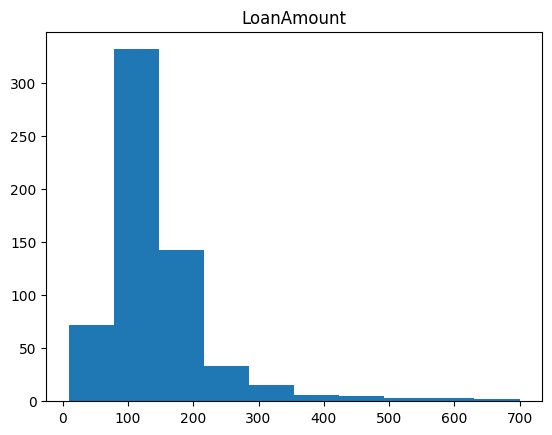

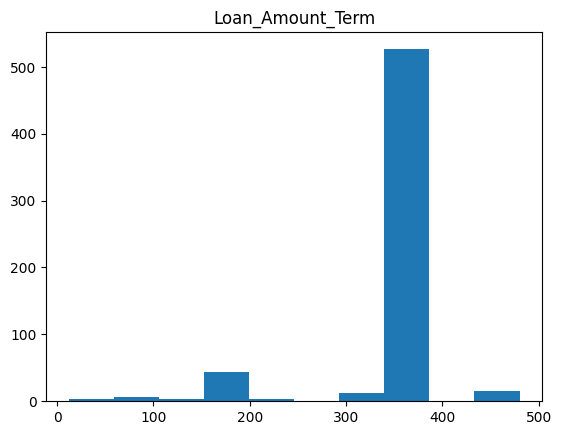

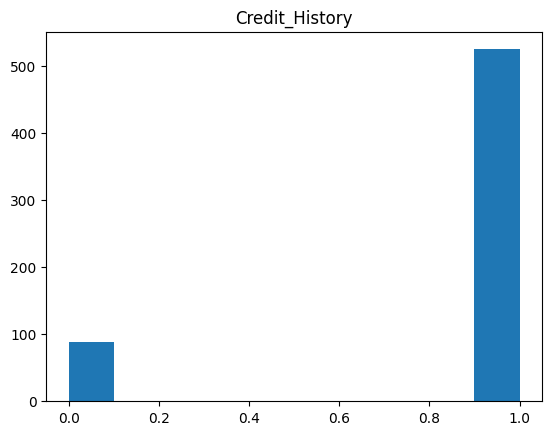

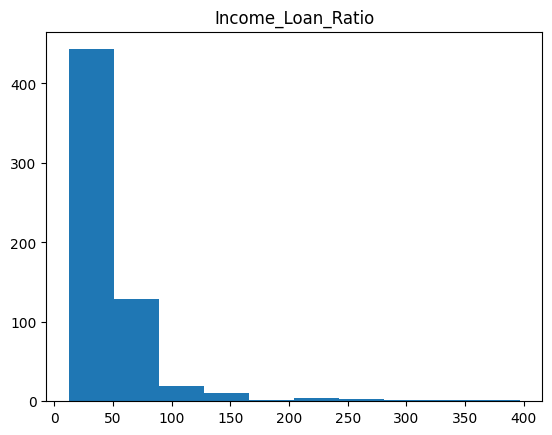

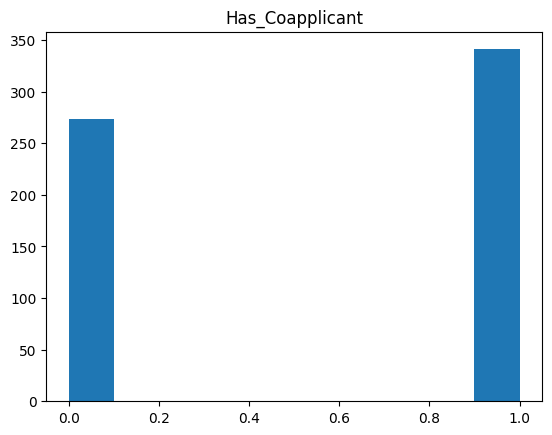

In [ ]:
for i in loan_number:
    plt.hist(loan_number[i])
    plt.title(i)
    plt.show()

Categorical Columns

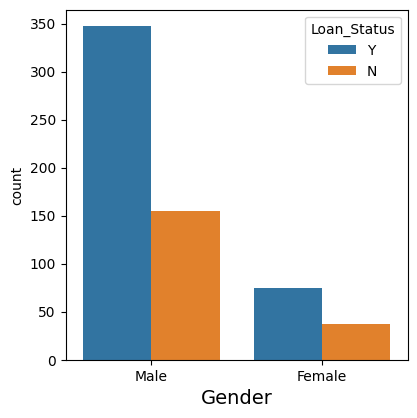

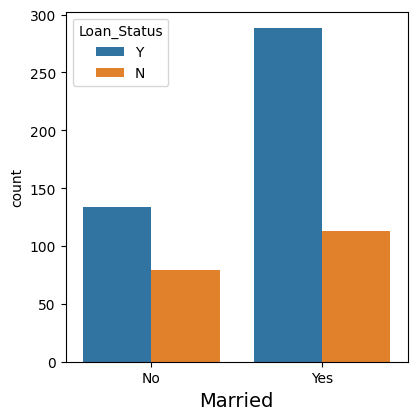

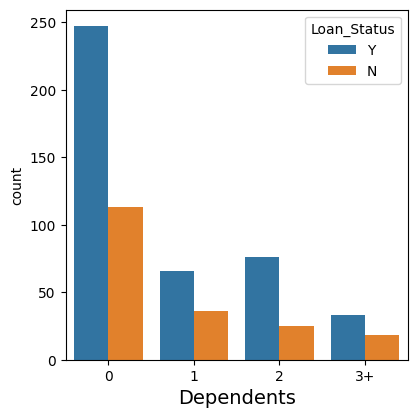

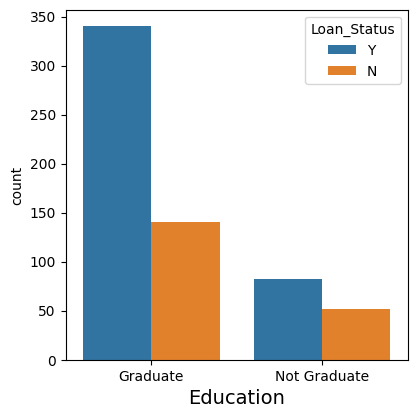

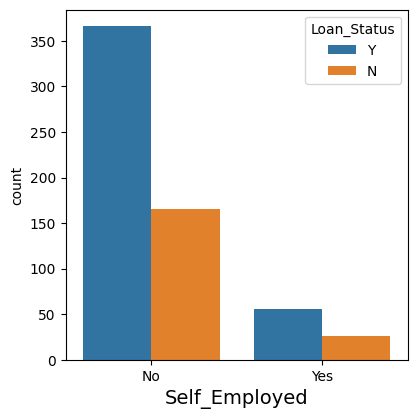

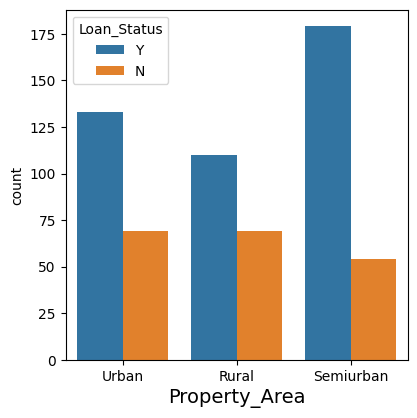

In [ ]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df_train)
    plt.xlabel(i, fontsize=14)

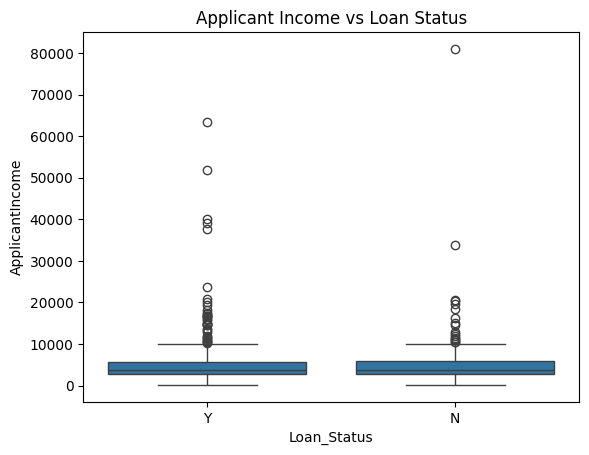

In [ ]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_train)
plt.title('Applicant Income vs Loan Status')
plt.show()

###Encoding

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
# convertind the Dependents column
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

# dropping the previous Dependents column
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}\n")
print(df_train.info(), "\n\n", df_test.info())

training set (row, col): (614, 13)

testing set (row, col): (367, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Dependents         599 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
Ran

In [ ]:
# Splitting features and target from training set
X = df_train.drop(['Loan_Status'], axis=1)
y = df_train['Loan_Status']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

XG Booster

In [ ]:
# One-hot encoding all categorical features
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Align training and validation sets to ensure they have the same columns after encoding
X_train, X_val = X_train.align(X_val, join='left', axis=1)

# Fill any missing values with 0 after alignment
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))

XGBoost Accuracy: 0.7236

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.49      0.55        43
           1       0.76      0.85      0.80        80

    accuracy                           0.72       123
   macro avg       0.70      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123


XGBoost Confusion Matrix:
 [[21 22]
 [12 68]]


Logistic Regression

In [ ]:
# Importing necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training Logistic Regression
lr_model = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter to help convergence
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')
print("\nLogistic Regression Classification Report:\n", classification_report(y_val, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))

Logistic Regression Accuracy: 0.7642

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123


Logistic Regression Confusion Matrix:
 [[21 22]
 [ 7 73]]


In [ ]:
# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

Random Forest Accuracy: 0.7073

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.30      0.42        43
           1       0.71      0.93      0.80        80

    accuracy                           0.71       123
   macro avg       0.70      0.61      0.61       123
weighted avg       0.70      0.71      0.67       123


Random Forest Confusion Matrix:
 [[13 30]
 [ 6 74]]


In [ ]:
# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')
print("\nDecision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))

Decision Tree Accuracy: 0.6911

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.42      0.49        43
           1       0.73      0.84      0.78        80

    accuracy                           0.69       123
   macro avg       0.65      0.63      0.63       123
weighted avg       0.68      0.69      0.68       123


Decision Tree Confusion Matrix:
 [[18 25]
 [13 67]]


Visualize the comparison

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store accuracies
model_accuracies = {}

# XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
model_accuracies['XGBoost'] = accuracy_xgb

print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
model_accuracies['Logistic Regression'] = accuracy_lr

print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
model_accuracies['Random Forest'] = accuracy_rf

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
model_accuracies['Decision Tree'] = accuracy_dt

print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

XGBoost Accuracy: 0.7236
Logistic Regression Accuracy: 0.7642
Random Forest Accuracy: 0.7073
Decision Tree Accuracy: 0.6911


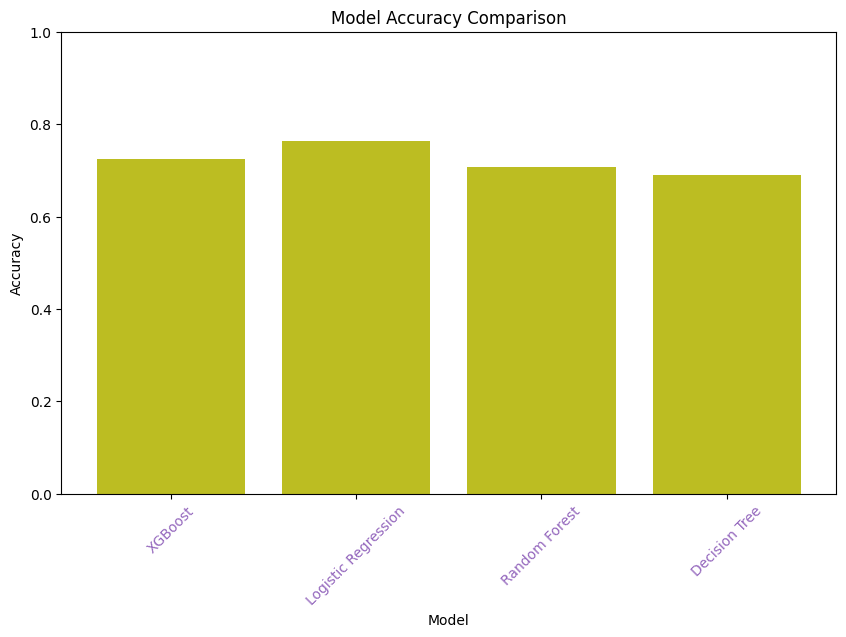

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='C8')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training Model Accuracy Comparison')
plt.ylim(0, 1)  # Setting y-axis range between 0 and 1 for accuracy
plt.xticks(rotation=45, color='C4')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Model evaluation
models = {'Random Forest': best_rf_model, 'Logistic Regression': lr_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"{model_name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_val, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")

Random Forest Accuracy: 0.7317
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123

Random Forest Confusion Matrix:
[[17 26]
 [ 7 73]]
Logistic Regression Accuracy: 0.7642
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123

Logistic Regression Confusion Matrix:
[[21 22]
 [ 7 73]]
XGBoost Accuracy: 0.7236
XGBoost Classification Report:
              precision    recall 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the validation data
y_pred_best_rf = best_rf_model.predict(X_val)
accuracy_best_rf = accuracy_score(y_val, y_pred_best_rf)
print(f'Tuned Random Forest Accuracy: {accuracy_best_rf:.4f}')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.7317
